<a href="https://colab.research.google.com/github/drunk3nb0at/OpenSteri/blob/main/OpenSteri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! nvidia-smi

Sat Oct 25 23:54:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = pd.DataFrame({
    "Sex-Favorable": [3, 2, 1],
    "Sex-Indifferent": [2, 2, 1],
    "Sex-Averse": [1, 1, 1]
}, index=["Sex-Positive", "Sex-Neutral", "Sex-Negative"])

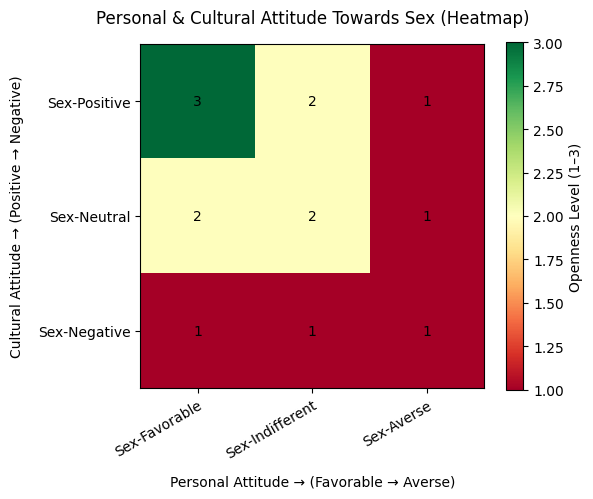

In [5]:

fig, ax = plt.subplots(figsize=(6, 5))
cmap = plt.cm.RdYlGn  # 绿色=开放，红色=保守

heatmap = ax.imshow(data.values, cmap=cmap, vmin=1, vmax=3)

ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.index)

# rotate x axis
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, data.iloc[i, j], ha="center", va="center", color="black")


ax.set_xlabel("Personal Attitude → (Favorable → Averse)", labelpad=10)
ax.set_ylabel("Cultural Attitude → (Positive → Negative)", labelpad=10)
ax.set_title("Personal & Cultural Attitude Towards Sex (Heatmap)", pad=15)


fig.colorbar(heatmap, ax=ax, label="Openness Level (1–3)")

plt.tight_layout()
plt.show()


In [ ]:

df = pd.read_csv("ContextualElements.csv")


df["Percent"] = df["Percent"].str.replace("%", "").astype(float)
type_summary = df.groupby("Type")["Percent"].mean().sort_values(ascending=True)

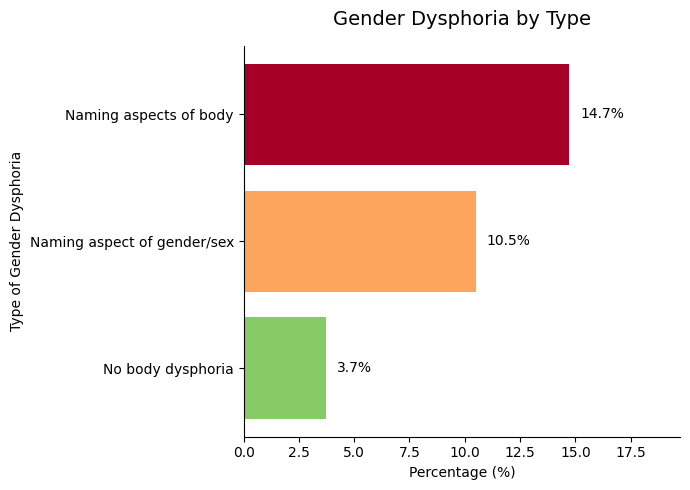

In [7]:



fig, ax = plt.subplots(figsize=(7, 5))
colors = plt.cm.RdYlGn_r(type_summary.values / type_summary.values.max())

bars = ax.barh(type_summary.index, type_summary.values, color=colors)


for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
            ha='left', va='center', fontsize=10)


ax.set_title("Gender Dysphoria by Type", fontsize=14, pad=15)
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Type of Gender Dysphoria")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, type_summary.max() + 5)

plt.tight_layout()
plt.show()


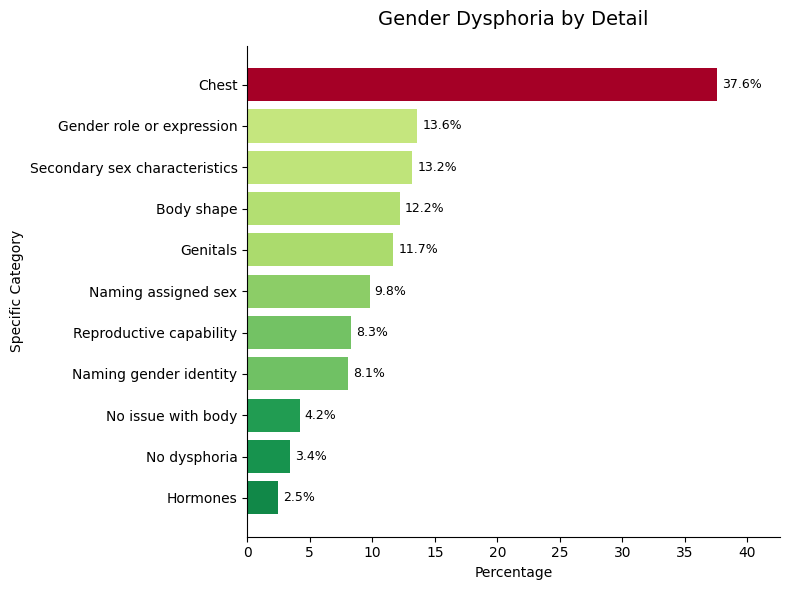

In [14]:



detail_summary = df.groupby("Detail")["Percent"].mean().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.RdYlGn_r(detail_summary.values / detail_summary.values.max())

bars = ax.barh(detail_summary.index, detail_summary.values, color=colors)


for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.4, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
            ha='left', va='center', fontsize=9)


ax.set_title("Gender Dysphoria by Detail", fontsize=14, pad=15)
ax.set_xlabel("Percentage")
ax.set_ylabel("Specific Category")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, detail_summary.max() + 5)

plt.tight_layout()
plt.show()

